In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# データセットの準備
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

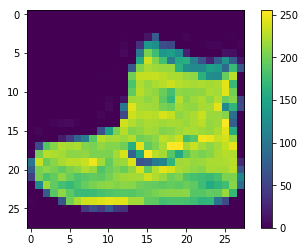

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [16]:
# データの前処理、ピクセル数を[0,1]にする
train_images = train_images / 255.0

test_images = test_images / 255.0

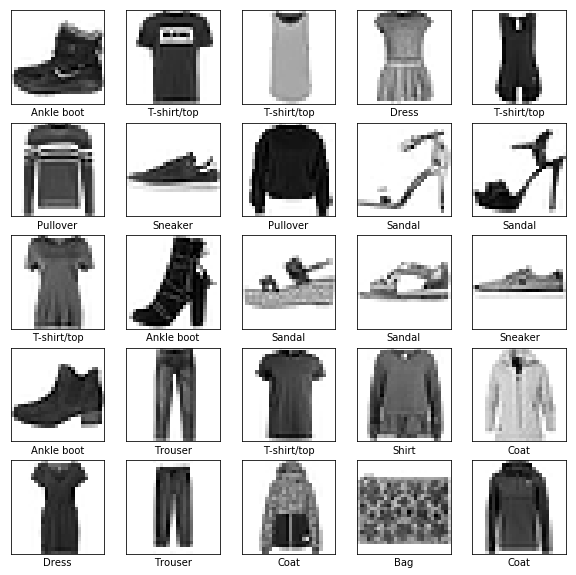

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [141]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [143]:
# Early-stopping 
early_stopping = keras.callbacks.EarlyStopping(patience=2, verbose= 1) 

In [132]:
# 各バッチの損失リスト
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history = LossHistory()

In [145]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [146]:
hist = model.fit(train_images, train_labels, batch_size=1024, epochs=100, \
                 validation_data=(test_images, test_labels), callbacks=[early_stopping, history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 17us/sample - loss: 1.3411 - acc: 0.5808 - val_loss: 0.8301 - val_acc: 0.7299
Epoch 2/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.6917 - acc: 0.7778 - val_loss: 0.6350 - val_acc: 0.7910
Epoch 3/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5709 - acc: 0.8131 - val_loss: 0.5672 - val_acc: 0.8078
Epoch 4/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5188 - acc: 0.8272 - val_loss: 0.5316 - val_acc: 0.8191
Epoch 5/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4892 - acc: 0.8356 - val_loss: 0.5085 - val_acc: 0.8248
Epoch 6/100
60000/60000 [==============================] - 1s 11us/sample - loss: 0.4680 - acc: 0.8425 - val_loss: 0.4984 - val_acc: 0.8268
Epoch 7/100
60000/60000 [==============================] - 1s 11us/sample - loss: 0.4530 - acc: 0.8469 - val_l

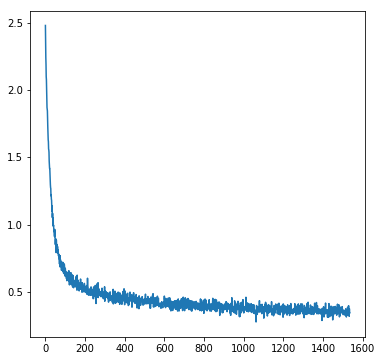

In [147]:
x = np.linspace(0, len(history.losses)+1, len(history.losses))
plt.figure(figsize=(6, 6))
plt.plot(x, history.losses)
plt.show()

In [75]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3603 - acc: 0.87130s - loss: 0.3757 - acc: 0
Test accuracy: 0.8713


In [55]:
predictions = model.predict(test_images)

In [56]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

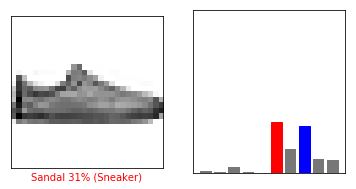

In [57]:
# i番目のテストサンプルの評価
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

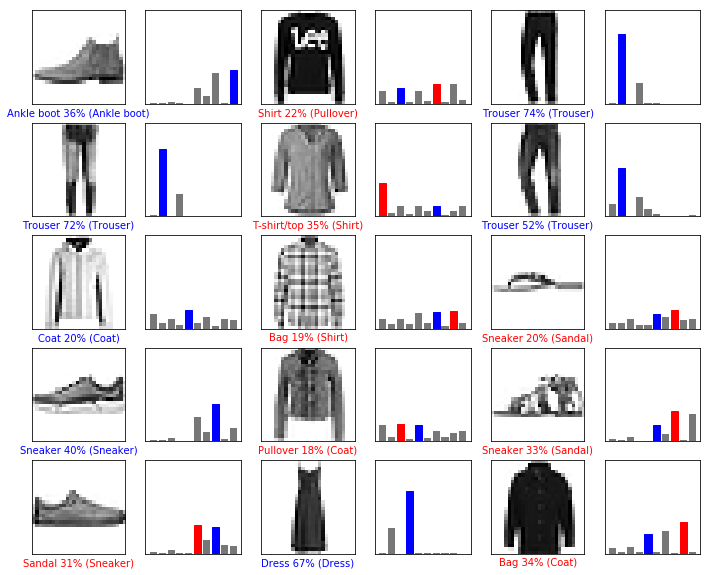

In [58]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)